## Лабораторная работа №1
**Задача:** подготовка данных для многомерного анализа

### Описание датасета "Predict Online Gaming Behavior Dataset"

Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.



| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


Целевая переменная — EngagementLevel — указывает на уровень вовлеченности игрока и категоризируется как 'Высокий', 'Средний' или 'Низкий'.

###  Предобработка данных

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#### Загрузка данных

In [60]:
df = pd.read_csv("../online_gaming_behavior_dataset.csv", index_col='PlayerID')

#### Первичный анализ данных

##### Общая информация о данных

In [61]:
df.head()

# GameDifficulty, Gender, Location, GameGenre, EngagementLevel

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [62]:
df.shape

(40034, 12)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40034 entries, 9000 to 49033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 4.0+ MB


In [64]:
# Описательная статистика
df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


##### Проверка пропущенных значений

In [65]:
# Количество пропущенных значений в каждом столбце
print(df.isnull().sum())

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


##### Анализ категориальных данных

In [66]:
# Уникальные значения и их количество в категориальных столбцах
for column in ['Gender', 'Location', 'GameGenre', 'EngagementLevel']:
    print(f'\n{df[column].value_counts(normalize=True)}')


Gender
Male      0.598466
Female    0.401534
Name: proportion, dtype: float64

Location
USA       0.399660
Europe    0.299845
Asia      0.202203
Other     0.098291
Name: proportion, dtype: float64

GameGenre
Sports        0.201029
Action        0.200804
Strategy      0.200130
Simulation    0.199406
RPG           0.198631
Name: proportion, dtype: float64

EngagementLevel
Medium    0.483939
High      0.258181
Low       0.257881
Name: proportion, dtype: float64


##### Анализ выбросов

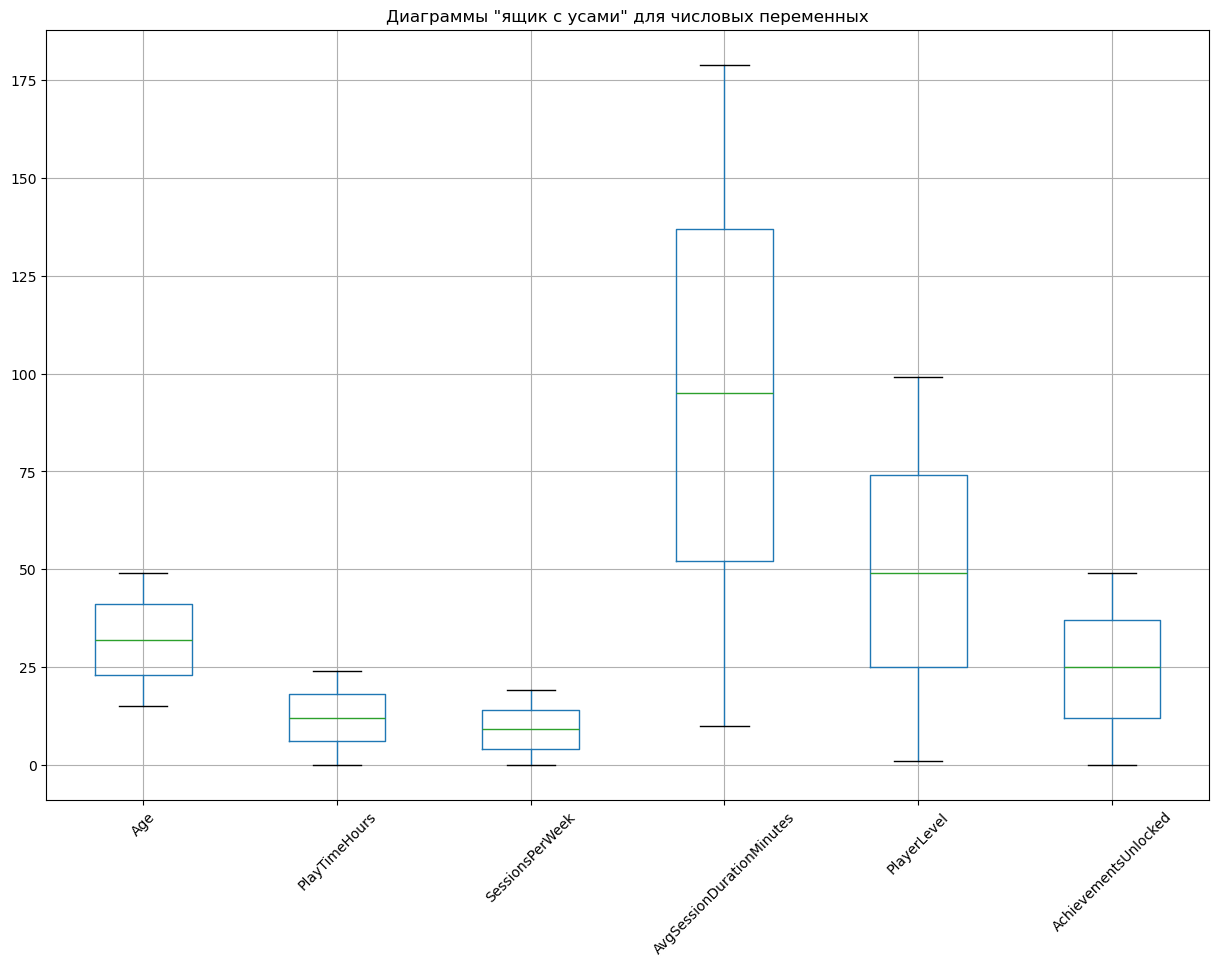

In [67]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != "InGamePurchases"]
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Диаграммы "ящик с усами" для числовых переменных')
plt.show()


В данных нет выбросов

In [68]:
# Функция для удаления выбросов в одном столбце, если бы выбросы были, то удалил бы с помощью этой фукнции выбросы
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    df = remove_outliers(df, column)


##### Обработка категориальных данных

Будем использовать One-Hot Encoding  для обработки категориальных данных.

Для целевой переменной преобразуем с помощью LabelEncoder


In [ ]:
# Применение One-Hot Encoding
categorical_col = ["GameDifficulty", "Gender", "Location", "GameGenre"]
label_col = 'EngagementLevel'
df_encoded = pd.get_dummies(df, columns=categorical_col)

le = LabelEncoder()
# Применение Label Encoding к целевой переменной
df_encoded[label_col] = le.fit_transform(df[label_col])

##### Разделение данных на train и test

Для обучение алгоритмов нам необходимо иметь train и test датасет, чтобы не переобучить модель, на train мы обучаем модель, а на test проверяем точность 

In [71]:
X = df_encoded.drop(columns=['EngagementLevel'])
y = df_encoded['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##### Нормализация данных

Нормализация данных — это процесс приведения числовых признаков к общему масштабу, что позволяет улучшить работу алгоритмов машинного обучения.

В данной работе будем использовать мин-макс нормализацию: приводит значения к диапазону от 0 до 1

In [72]:
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [75]:
X_train[numeric_columns]

,Age,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
PlayerID,,,,,,
22686,0.882353,0.644979,0.526316,0.579882,0.867347,0.387755
46598,0.264706,0.683431,0.263158,0.396450,0.561224,0.469388
46339,0.882353,0.830031,0.315789,0.153846,0.030612,0.469388
15804,0.558824,0.141323,0.210526,0.236686,0.091837,0.000000
14674,0.823529,0.376529,0.684211,0.076923,0.591837,0.448980
...,...,...,...,...,...,...
46608,0.588235,0.401856,0.210526,0.301775,0.428571,0.040816
12174,0.588235,0.300826,0.315789,0.325444,0.642857,0.612245
13647,0.000000,0.765618,0.473684,0.360947,0.091837,0.448980


### Вывод

В результате данной лабораторной работы были сделаны следующие шаги для первичного анализ данных:
1. Описательная статистика
2. Проверка пропущенных значений
3. Анализ категориальных данных
4. Анализ выбросов
5. Обработка категориальных данных
6. Разделение данных на train и test
7. Нормализация данных

In [77]:
X_train.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,...,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
PlayerID,,,,,,,,,,,,,,,,,,,,,
22686,0.882353,0.644979,1,0.526316,0.579882,0.867347,0.387755,True,False,False,...,True,False,True,False,False,False,False,False,False,True
46598,0.264706,0.683431,0,0.263158,0.396450,0.561224,0.469388,True,False,False,...,False,False,True,False,False,False,False,False,False,True
46339,0.882353,0.830031,1,0.315789,0.153846,0.030612,0.469388,False,False,True,...,True,False,False,False,True,False,False,True,False,False
15804,0.558824,0.141323,0,0.210526,0.236686,0.091837,0.000000,True,False,False,...,False,False,True,False,False,False,True,False,False,False
14674,0.823529,0.376529,0,0.684211,0.076923,0.591837,0.448980,True,False,False,...,True,True,False,False,False,False,False,False,False,True
